In [1]:
import pandas as pd

billboard_df = pd.read_csv("billboard_100.csv")

genius_characters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-& '

def format_for_genius(string):
    formatted_string = ''
    for character in string:
        if character in genius_characters:
            formatted_string += character
    return formatted_string

def remove_features(string):
    for i in range(len(string)):
        if string[i:i+9] == 'featuring' or string[i:i+4] == 'with':
            string = string[:i-1]
    return string

def format_genius_lyrics(string):
    lyrics_started = False
    formatted_string = ''
    bracket_open = False

    for i in range(len(string)):
        # The string Lyricsgenius returns starts with some text about the
        # number of contributors and '[Title] lyrics', so this code makes 
        # sure it doesn't start reading until after it sees that word.
        if string[i-6:i] == 'Lyrics':
            lyrics_started = True
        # Adds all text not in brackets
        if lyrics_started is True:
            if string[i] == '[':
                bracket_open = True
            if bracket_open is False:
                formatted_string += string[i]
            if string[i] == ']':
                bracket_open = False
            if string[i+1:i+6] == 'Embed':
                lyrics_started = False

    # LyricsGenius sometimes leaves a random string of numbers right
    # before the Embed at the end, so this makes sure we get rid of those
    while True:
        if formatted_string[-1] not in '1234567890':
            break
        formatted_string = formatted_string[:-1]
    # Turn newlines into spaces to improve formatting for sentiment analysis
    formatted_string = formatted_string.replace('\n', ' ')
    
    return formatted_string





title = []
artists = []

for i in range(len(x)):
    title.append(format_for_genius(x['Title'][i]))
    artists.append(format_for_genius(remove_features(x['Artist(s)'][i])))

title_series = pd.Series(title)
artists_series = pd.Series(artists)
# '''
lyrics = []

from lyricsgenius import Genius
import api_key
import time

token = api_key.client_access_token

genius = Genius(token)

for i in range(5):
    song = genius.search_song(title_series[i], artists_series[i])
    time.sleep(.5)
    lyrics.append(format_genius_lyrics(song.lyrics))

df = pd.DataFrame({'No.':billboard_df['No.'][:5], 'Title': title_series[:5], 'Artists': artists_series[:5], 'Year': billboard_df['Year'][:5], 'Lyrics': pd.Series(lyrics)})

# print(df)
# '''    
df.to_csv('billboard_with_lyrics', encoding='utf-8', index=False)    






NameError: name 'x' is not defined

In [3]:
import helpers
import pandas as pd

billboard_df = pd.read_csv("billboard_100.csv")
[title, artists] = helpers.generate(billboard_df)
print(title)

['Thrift Shop', 'Blurred Lines', 'Radioactive', 'Harlem Shake', 'Cant Hold Us', 'Mirrors', 'Just Give Me a Reason', 'When I Was Your Man', 'Cruise', 'Roar', 'Locked Out of Heaven', 'Ho Hey', 'Stay', 'Get Lucky', 'Royals', 'I Knew You Were Trouble', 'We Cant Stop', 'Wrecking Ball', 'Wake Me Up', 'Suit and Tie', 'Cups Pitch Perfects When Im Gone', 'Holy Grail', 'Scream and Shout', 'Clarity', 'Sail', 'Dont You Worry Child', 'Diamonds', 'I Love It', 'Safe and Sound', 'Treasure', 'The Way', 'Started from the Bottom', 'Come and Get It', 'Hold On Were Going Home', 'Daylight', 'Feel This Moment', 'Applause', 'One More Night', 'Love Me', 'My Songs Know What You Did in the Dark Light Em Up', 'Fuckin Problems', 'Beauty and a Beat', 'Same Love', 'Sweet Nothing', 'Summertime Sadness', 'Home', 'Its Time', 'Power Trip', 'Girl on Fire', 'Heart Attack', 'Love Somebody', 'I Will Wait', 'Try', 'Wagon Wheel', 'Gangnam Style', 'I Need Your Love', 'Die Young', 'Some Nights', 'Bad', 'Boys Round Here', 'Gone 

In [3]:
import pandas as pd
from lyricsgenius import Genius

import helper_function
import api_key

genius = Genius(api_key.client_access_token)
billboard_df = pd.read_csv("billboard_100.csv")

artists = helper_function.generate(billboard_df)

artists_series = pd.Series(artists)
lyrics = []
num_songs = 10

for i in range(num_songs):
    while True:
        try:
            song = genius.search_song(billboard_df['Title'][i], artists_series[i])
            break
        except:
            pass
    lyrics.append(helper_function.format_genius_lyrics(song.lyrics))

df = pd.DataFrame(
    {
        "No.": billboard_df["No."][:num_songs],
        "Title": billboard_df['Title'][:num_songs],
        "Artists": artists_series[:num_songs],
        "Year": billboard_df["Year"][:num_songs],
        "Lyrics": pd.Series(lyrics),
    }
)

df.to_csv("billboard_data_with_lyrics_fake", encoding="utf-8", index=False)

KeyError: 'Artists'

[0.48810363636363635, 0.2360072727272727, 0.3990490909090909, 0.17267818181818181, 0.379630909090909, 0.20084, 0.4444927272727274, 0.32266000000000006, 0.14055999999999996, 0.14794000000000002, 0.4682818181818182, 0.2565527272727273, 0.3407109090909091, 0.5672581818181819, 0.40072, 0.2590109090909091, 0.27617636363636366, 0.16998181818181818, 0.33677636363636365, 0.2055381818181818]


NameError: name 'mpl' is not defined

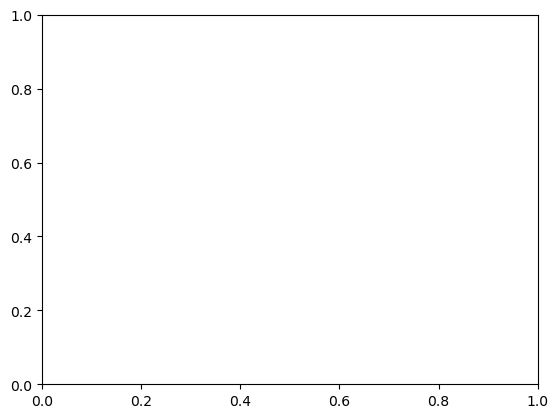

In [16]:
#FIRST VISUALIZATION

import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from mplcursors import cursor  # separate package must be installed

# nltk.download("vader_lexicon") # This line only needs to be run the first time you run the program
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

loaded_data = pd.read_csv('billboard_data_with_lyrics')
lyrics_data = loaded_data['Lyrics']

positivity_scores = []
entry_number = []

for i in range(len(lyrics_data)):
    lyrics = lyrics_data[i]
    positivity_scores.append(analyzer.polarity_scores(lyrics_data[i])['compound'])
    entry_number.append(i)

all_data = pd.concat([loaded_data, pd.DataFrame({'Positivity':positivity_scores})],axis=1)

positivity_by_position = [0]*100

for i in range(len(all_data)):
    positivity_by_position[all_data['No.'][i]-1] += 1/11 * all_data['Positivity'][i]

adj_positivity_by_position = []

for i in range(20):
    adj_positivity_by_position.append(sum(positivity_by_position[i*5:i*5+5])/5)

print(adj_positivity_by_position)

# plt.scatter(range(1, 21), adj_positivity_by_position)
# z = np.polyfit(range(1,21), adj_positivity_by_position, 1)
# p = np.poly1d(z)
# plt.plot(range(1,21),p(range(1,21)),"r--")



scores = [sum(positivity_scores[:101])/100, sum(positivity_scores[100:201])/100, sum(positivity_scores[200:301])/100, sum(positivity_scores[300:401])/100, sum(positivity_scores[400:501])/100, sum(positivity_scores[500:601])/100, sum(positivity_scores[600:701])/100, sum(positivity_scores[700:801])/100, sum(positivity_scores[800:901])/100, sum(positivity_scores[900:1001])/100, sum(positivity_scores[1000:1101])/100]
years = [2013.5, 2014.5, 2015.5, 2016.5, 2017.5, 2018.5, 2019.5, 2020.5, 2021.5, 2022.5, 2023.5]

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#0690f9' #dark blue
c2='#cde9fe' #green
n=100

fig, ax = plt.subplots()
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=4) 
plt.show()


plt.plot(years, scores, 'r--')
indiv_scores = plt.scatter(np.linspace(2013, 2023.99, num=1100), positivity_scores)
labels = all_data['Title']
cursor(hover=True)
plt.show()


# z = np.polyfit(years, scores, 1)
# p = np.poly1d(z)
# plt.plot(years,p(years),"r--")

# print(lyrics)

# scores = analyzer.polarity_scores(lyrics_data[0])['compound']
# print(scores)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/wyoung/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<class 'mplcursors._mplcursors.Cursor'>


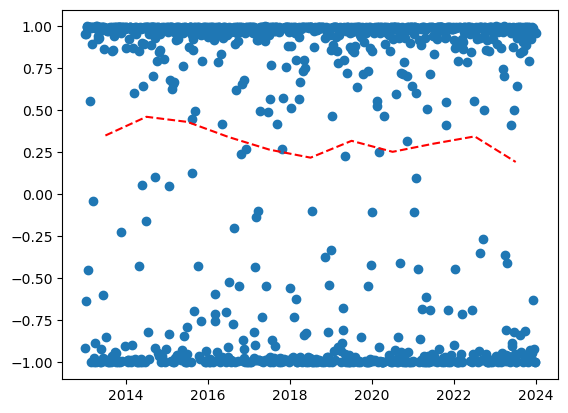

In [3]:
# FIRST VISUALIZATION

import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from matplotlib.patheffects import withSimplePatchShadow
import mplcursors  # separate package must be installed
import helper_function
import csv
import re
from wordcloud import WordCloud

nltk.download("vader_lexicon")  # Run this line the first time you run this code
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# import data
loaded_data = pd.read_csv("billboard_data_with_lyrics")
lyrics_data = loaded_data["Lyrics"]

positivity_scores = []
entry_number = []

for i in range(len(lyrics_data)):
    lyrics = lyrics_data[i]
    positivity_scores.append(
        analyzer.polarity_scores(lyrics_data[i])["compound"]
    )
    entry_number.append(i)

all_data = pd.concat(
    [loaded_data, pd.DataFrame({"Positivity": positivity_scores})], axis=1
)

positivity_by_position = [0] * 100

for i in range(len(all_data)):
    positivity_by_position[all_data["No."][i] - 1] += (
        1 / 11 * all_data["Positivity"][i]
    )

scores = [
    sum(positivity_scores[:101]) / 100,
    sum(positivity_scores[100:201]) / 100,
    sum(positivity_scores[200:301]) / 100,
    sum(positivity_scores[300:401]) / 100,
    sum(positivity_scores[400:501]) / 100,
    sum(positivity_scores[500:601]) / 100,
    sum(positivity_scores[600:701]) / 100,
    sum(positivity_scores[700:801]) / 100,
    sum(positivity_scores[800:901]) / 100,
    sum(positivity_scores[900:1001]) / 100,
    sum(positivity_scores[1000:1101]) / 100,
]
years = [
    2013.5,
    2014.5,
    2015.5,
    2016.5,
    2017.5,
    2018.5,
    2019.5,
    2020.5,
    2021.5,
    2022.5,
    2023.5,
]  # add .5 to all years to make visualization more effective

plt.figure()
plt.plot(years, scores, "r--")  # plot general trend line
indiv_scores = plt.scatter(
    np.linspace(2013, 2023.99, num=1100), positivity_scores
)  # plot every song


def show_hover_panel(get_text_func=None):
    """
    Returns a 
    """
    cursor = mplcursors.cursor(
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )
    print(type(cursor))
    return cursor


def on_add(index):
    """
    Returns the text that should be displayed when the cursor is hovering over a
    specific data point.
    Args: 
        index: an integer representing the index of the current data point in
        the dataset
    Returns:
        A string containing the text to be displayed when the specific data 
        point is hovered over.
    """
    try:
        parts = [
            f"Song: {all_data['Title'][index]}",
            f"Artist: {all_data['Artists'][index]}",
            f"Chart Position: {all_data['No.'][index]}",
            f"Score: {all_data['Positivity'][index]}",
        ]
        return "\n".join(parts)
    except KeyError:  # don't hover when the cursor is over the trendline
        pass

show_hover_panel(on_add)  # add hover labels
plt.show()

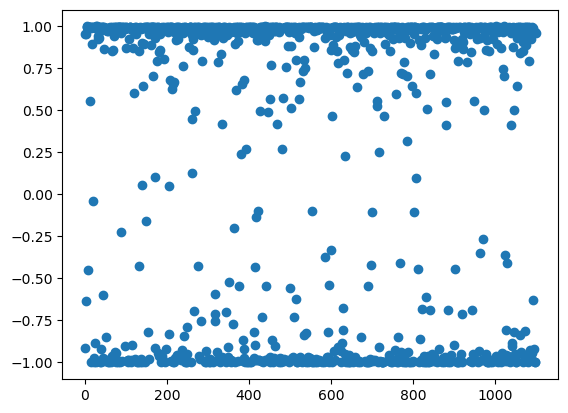

In [31]:
plt.scatter(range(len(all_data)), positivity_scores)

Things we could investigate:
Lyrical complexity - has the number of unique words on average increased?
Increased use of other languages - has the number of words not in the english dictionary increased?

Tooltip show every song


In [5]:
import pandas as pd
from lyricsgenius import Genius

import helper_function
import api_key

genius = Genius(api_key.client_access_token)
billboard_df = pd.read_csv("billboard_100.csv")

artists = helper_function.generate(billboard_df)

artists_series = pd.Series(artists)
lyrics = []
num_songs = 4

for i in range(num_songs):
    while True:
        try:
            song = genius.search_song(
                billboard_df["Title"][i], artists_series[i]
            )
            break
        except:
            pass
    lyrics.append(song.lyrics)

print(lyrics)

Searching for "Thrift Shop" by Macklemore & Ryan Lewis...
Done.
Searching for "Blurred Lines" by Robin Thicke...
Done.
Searching for "Radioactive" by Imagine Dragons...
Done.
Searching for "Harlem Shake" by Baauer...
Done.
['326 ContributorsTranslationsFrançaisThrift Shop Lyrics[Intro]\nHey, Macklemore, can we go thrift shopping?\nWhat-what, what, what?\nWhat-what, what, what?\nWhat-what, what, what?\nWhat-what, what, what? (Da)\nWhat-what, what, what? (Da-dum, ba-dum, ba-da-do-da)\nWhat-what, what, what? (Da-dum, ba-dum, ba-da-do-da)\nWhat-what, what, what? (Da-dum, ba-dum, ba-da-do-da)\nWhat-what, what, what? (Da-dum, ba-dum, ba-da-do-da)\nDa-dum, ba-dum, ba-da-do-da\nDa-dum, ba-dum, ba-da-do-da\nDa-dum, ba-dum, ba-da-do-da\nDa-dum, ba-dum, ba-da-do-da\n[Chorus: Wanz & Macklemore]\nI\'m gonna pop some tags\nOnly got twenty dollars in my pocket\nI\'m, I\'m, I\'m huntin\', lookin\' for a come up\nThis is fucking awesome (Now)\n\n[Verse 1: Macklemore]\nWalk into the club like, "What up?

In [6]:
import pandas as pd

test_data = pd.DataFrame(
    {
        "Artists": ["Beyonce", "SZA", "Drake"],
        "Songs": ["Halo", "Kill Bill", "Hotline Bling"],
    }
)
print(test_data)

   Artists          Songs
0  Beyonce           Halo
1      SZA      Kill Bill
2    Drake  Hotline Bling


In [13]:
from helper_function import split_text_into_words

split_text_into_words("This is several Words")

['This', 'is', 'several', 'Words']